In [1]:
# Chapter18
# 18.1 Read data from file
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() # ヘッダーは無視する
    for line in dataFile:
        d, m = line.split(' ')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

In [3]:
import pylab

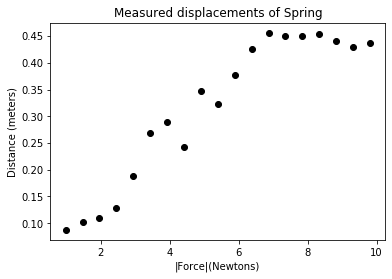

In [5]:
def plotData(inpuFile):
    masses, distances = getData(inpuFile)
    distances = pylab.array(distances) # 配列(numpy.ndarray)に変換
    masses = pylab.array(masses) # 配列(numpy.ndarray)に変換
    forces = masses*9.81 # f = m*g
    pylab.plot(forces,distances, 'ko',label='Measured displacements')
    pylab.title('Measured displacements of Spring')
    pylab.xlabel('|Force|(Newtons)')
    pylab.ylabel('Distance (meters)')

plotData('springData.txt')

In [20]:
# 18.3
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances[:-6]) # 弾性限界を超えた点を除去
    forces = pylab.array(masses[:-6])*9.81　# 弾性限界を超えた点を除去
    pylab.plot(forces,distances,'ko',label='Measured displacements')
    pylab.title('Measured displacements')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    # 1次の回帰直線を求める
    a, b = pylab.polyfit(forces,distances,1) # pylab.polyfit(x,y,digree)
    predictedDistances = a * pylab.array(forces) + b # y = ax+b
    k = 1.0/a # ばね係数
    pylab.plot(forces, predictedDistances, label = 'Displacements predicted by \n nlinear fit, k=' + str(round(k,5)))
    fit = pylab.polyfit(forces,distances,3)
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces,predictedDistances,'k:',label = 'cubic fit')
    pylab.legend(loc='best')

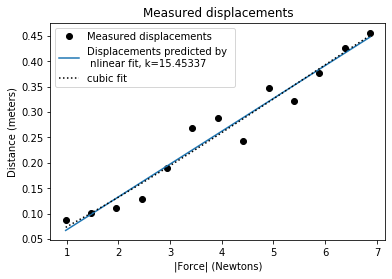

In [21]:
fitData('springData.txt')

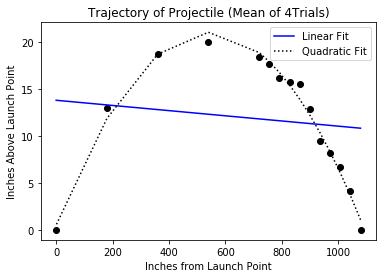

In [23]:
# 18.4
def getTrajectoryData(fileName):
    dataFile = open(fileName,'r')
    distaces = []
    heights1, heights2, heights3,heights4 = [],[],[],[]
    dataFile.readline() # ignore header
    for line in dataFile:
        d,h1,h2,h3,h4 = line.split()
        distaces.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distaces,[heights1,heights2,heights3,heights4]) # タプルで返却

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    # 各距離における高さの平均値を持つ配列を得る
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h) # 要素ごとに足し算
    meanHeights = totHeights/len(heights)
    pylab.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + 'Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    fit = pylab.polyfit(distances, meanHeights, 1)
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances,altitudes, 'b', label='Linear Fit')
    fit = pylab.polyfit(distances,meanHeights,2)
    altitudes = pylab.polyval(fit,distances)
    pylab.plot(distances,altitudes, 'k:', label='Quadratic Fit')
    pylab.legend()
processTrajectories('launcherData.txt')

In [36]:
# 18.5
def rSquared(measured, predicted):
    """measured: 観測値の一次元配列
       predicted: 予測値の一次元配列
       返り値: 決定係数　r^2 = 1 - Σ(yi-pi)^2/Σ(yi-μ)^2"""
    estimateError = ((predicted - measured)**2).sum()
    meanOfMeasured = measured.sum() / len(measured)
    variability = ((measured - meanOfMeasured)**2).sum()
    return 1 - estimateError / variability

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    # 各距離における高さの平均値を持つ配列を得る
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h) # 要素ごとに足し算
    meanHeights = totHeights/len(heights)
    pylab.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + 'Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    fit = pylab.polyfit(distances, meanHeights, 1)
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances,altitudes, 'b', label='Linear Fit')
    print('rSquared of linear fit =', rSquared(meanHeights, altitudes))
    fit = pylab.polyfit(distances,meanHeights,2)
    altitudes = pylab.polyval(fit,distances)
    pylab.plot(distances,altitudes, 'k:', label='Quadratic Fit')
    print('rSquared of quadratic fit =', rSquared(meanHeights, altitudes))
    pylab.legend()
    getHorizontalSpeed(fit,distances[-1],distances[0])
processTrajectories('launcherData.txt')

rSquared of linear fit = 0.0177433205440769
rSquared of quadratic fit = 0.9857653692869693
nan


ValueError: cannot convert float NaN to integer

観測されたデータを...
- 線形モデルで説明することができるのは 約2%以下
- 2次のモデルで説明することができるのは 約98%以上
であることが分かる。

rSquared of linear fit = 0.0177433205440769
rSquared of quadratic fit = 0.9857653692869693
Horizontal speed= 136 feet/sec


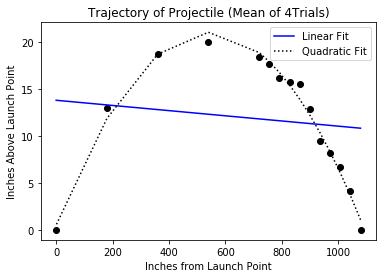

In [39]:
# 18.6
def getHorizontalSpeed(quadFit, minX, maxX):
    """quadFit: 2次多項式の係数が格納されていることを仮定
       minX: 距離（インチ単位）
       maxX: 距離（インチ単位）"""
    inchesPerFoot = 12
    xMid = (maxX - minX)/2
    a,b,c = quadFit[0],quadFit[1],quadFit[2]
    yPeak = a * xMid**2 + b * xMid + c
    g = 32.16 * inchesPerFoot
    t = (2*yPeak/g)**0.5
    print('Horizontal speed=',int(xMid/(t*inchesPerFoot)), 'feet/sec')

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    # 各距離における高さの平均値を持つ配列を得る
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h) # 要素ごとに足し算
    meanHeights = totHeights/len(heights)
    pylab.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + 'Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    fit = pylab.polyfit(distances, meanHeights, 1)
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances,altitudes, 'b', label='Linear Fit')
    print('rSquared of linear fit =', rSquared(meanHeights, altitudes))
    fit = pylab.polyfit(distances,meanHeights,2)
    altitudes = pylab.polyval(fit,distances)
    pylab.plot(distances,altitudes, 'k:', label='Quadratic Fit')
    print('rSquared of quadratic fit =', rSquared(meanHeights, altitudes))
    pylab.legend()
    getHorizontalSpeed(fit,distances[-1],distances[0])
processTrajectories('launcherData.txt')

- 物理的システムの振る舞いに関するデータを取得するために実験を行う
- 次に、そのシステムのモデルを見つけ、さらにその質を評価するための計算を行う
- 最後に、何らかの理論と分析を用いて、モデルの興味深い結果を導くための分かりやすい計算手順を設計する

Model predicts that 3**20 is roughly 2.4547827637212492e+48
Actual value of 3**20 is 3486784401


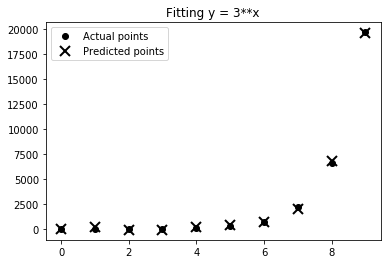

In [45]:
# 18.3 指数的に分布するデータに適合させる
# 18.7 指数的に分布するデータへの多項式曲線の適合
vals = []
for i in range(10):
    vals.append(3**i) # y = 3^x
pylab.plot(vals,'ko',label='Actual points') # 実際の値をプロット
xVals = pylab.arange(10)
fit = pylab.polyfit(xVals,vals,5) # 5次でfitting
yVals = pylab.polyval(fit,xVals) # (係数, x軸データ)
pylab.plot(xVals, yVals, 'kx', label='Predicted points', markeredgewidth=2, markersize=10) # 予測値をプロット
pylab.title('Fitting y = 3**x')
pylab.legend(loc='upper left') # 凡例

# 3**20の時のモデルの予測値
print('Model predicts that 3**20 is roughly', pylab.polyval(fit, [3**20])[0]) # (係数, x軸の値)[0]第1要素
print('Actual value of 3**20 is', 3**20)

- 指数的に分布するデータに対してよく適合する多項式が存在しない。